# Evaluation
Wie bereits beim Clustering gibt es Maße, die eine Aussage über die Leistung eines Klassifikators in einen numerischen Wert fassen. In diesem Abschnitt sollen Ihnen mehrere dieser Maße anhand eines Beispiels gezeigt werden.

Die ersten Code-Zellen laden Pandas und den Datensatz [weight-height.csv](https://www.kaggle.com/datasets/mustafaali96/weight-height), den Sie bereits aus der Einleitung dieses Kapitels kennen. Die Spalte `gender` wird zudem in ein numerisches Attribut transformiert.

In [ ]:
from ipywidgets import interact, IntSlider
import pandas as pd
import plotly.express as px

from tui_dsg.datasets import weightheight_path

In [ ]:
df = pd.read_csv(weightheight_path)
px.scatter(df, x='weight', y='height', color='gender')

In [ ]:
df['gender'] = df['gender'].map({'f': 0, 'm': 1})

## Inhaltsverzeichnis
- [Trainings- und Testdaten](#Trainings--und-Testdaten)
- [Training des Klassifikators](#Training-des-Klassifikators)
- [Genauigkeit](#Genauigkeit)
- [Detaillierter Wahrheitsgehalt von Vorhersagen](#Detaillierter-Wahrheitsgehalt-von-Vorhersagen)
- [Precision](#Precision)
- [Recall](#Recall)
- [Kompromisse](#Kompromisse)
- [F1-Maß](#F1-Maß)

## Trainings- und Testdaten
Bisher wurden die Daten ausschließlich zum Training verwendet. Um jedoch den Erfolg des Lernens bewerten zu können, müssen zusätzlich annotierte Testdaten bereitstehen. Im einfachsten Fall wird dazu eine Menge bekannter Daten vor dem Lernen des Klassifikators in Trainings- und Testdaten aufgeteilt aufgeteilt werden. Die hilfreiche Funktion `train_test_split` stammt aus dem Paket `scikit-learn` und kann sowohl NumPy Arrays wie auch Pandas DataFrames aufteilen.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)

len(df_train), len(df_test)

Den Namen entsprechend wird der Trainingsdatensatz für das Training und der Testdatensatz für die Überprüfung des Lernerfolgs eingesetzt. Verwenden Sie die selbe Menge für beide Schritte, besteht die Möglichkeit, dass der Klassifikator den Trainingsdatensatz "auswendig lernt" und damit eine sehr gute Wertung mit diesen Beispielen erreicht. Stattdessen soll der Klassifikator jedoch verallgemeinern, sodass auch neu hinzukommende, unbekannte Daten korrekt eingeordnet werden.

Stellen Sie sich analog einen Studenten vor, der für eine bevorstehende Prüfung lernt. Alte Klausuren dienen dabei als Trainingsdatensatz. Gibt es nur wenige Aufgaben, kann auswendig lernen und wiedergeben der alten Lösungen effizienter sein als sie zu verstehen und den Lösungsansatz zu verallgemeinern. Nach einer bestandenen Prüfung erwartet man in aller Regel jedoch genau letzteres - Lösungsstrategien sollten auf neue Probleme angewendet werden können. Prüfer werden sich also davor hüten, die Bewertung von Aufgaben abhängig zu machen, die dem Lernenden alle bereits zur Verfügung standen.

Gerade im Bereich des tiefen Lernens geschieht es jedoch schnell, dass die Netzkapazität ausreicht, um auch zunächst umfangreich erscheinende Mengen an Trainingsdaten auswendig zu lernen. Man spricht dann von *Overfitting*. Wenn der Fehler bei der Klassifikation von Trainingsbeispielen kontinuierlich sinkt, während er in Zusammenhang mit den Testbeispielen steigt, ist dies ein starkes Indiz. (Der Prüfling wäre in diesem Fall im Stande alle alten Klausuren zügig zu lösen und würde trotzdem durchfallen.)

Zu welchen Anteilen Trainings- und Testdaten gewählt werden sollten hängt indes stark von deren Anzahl, der Komplexität des Klassifikators, der gewählten Lernmethode und weiteren Faktoren ab. Beim tiefen Lernen wird gelegentlich sogar eine dritte Teilmenge zur Validierung der Parameter genutzt. Im Allgemeinen ist eine Aufteilung, die grob $75$ Prozent des Datensatzes den Trainingsdaten zuordnet, ein guter Anfang.

Achten Sie zudem darauf, dass die Daten vor der Aufteilung zufällig gemischt werden. Sind bei der Erhebung zuerst Frauen und anschließend Männer untersucht worden und sie wählen das letzte Viertel als Testdatensatz, enthält dieser ansonsten nur die Werte der Herren.

## Training des Klassifikators
Um die Leistung des Klassifikators zu bewerten, kommt als Beispiel ein Nächster-Nachbar-Klassifikator zum Einsatz. Dieser wird anhand der Trainingsdaten lernen und anschließend anhand der Testdaten bewertet. Die nachfolgende Zelle definiert jedoch nur eine Funktion, die Training und Bewertung übernimmt, sodass Sie bei jedem Gütemaß die Möglichkeit haben, interaktiv die Auswirkung des Parameters `n_neighbors` zu erkunden.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def fit_and_predict(n, test_data=df_test):
    nn = KNeighborsClassifier(n_neighbors=n).fit(df_train[['weight', 'height']], df_train['gender'])
    prediction = nn.predict(test_data[['weight', 'height']])

    return prediction

## Genauigkeit
Die Genauigkeit ist das einfachste Maß zur Bewertung eines Klassifikators. Sie gibt den relativen Anteil der korrekt klassifizierten Objekte an und ist damit sehr einfach zu berechnen. Sie können dazu eine Funktion aus dem Paket `scikit-learn` verwenden, die $1$ bei einer perfekten Klassifikation und $0$ bei keinerlei richtigen Ergebnissen zurückgibt.

In [ ]:
from sklearn.metrics import accuracy_score

@interact(n=IntSlider(3, 1, 30, 1))
def _(n):
    return accuracy_score(df_test['gender'], fit_and_predict(n))

**Verständnisfrage**: Für welches $n$ liefert der Klassifikator beim Trainingsdatensatz eine möglichst hohe Genauigkeit?

In [ ]:
@interact(n=IntSlider(3, 1, 30, 1))
def _(n):
    return accuracy_score(df_train['gender'], fit_and_predict(n, test_data=df_train))

## Detaillierter Wahrheitsgehalt von Vorhersagen
Die Annahme, eine Vorhersage könnte lediglich falsch oder korrekt liegen, mag schlüssig sein, greift aber zu kurz. Im Folgenden unterteilen wir am Beispiel der binären Klassifikation mit zwei Klassen sowohl richtige wie falsche Vorhersagen jeweils in zwei Unterkategorien. Diese Kategorisierung ist dabei abhängig von der getroffenen Vorhersage wie von der tatsächlichen Klasse eines Objekts.

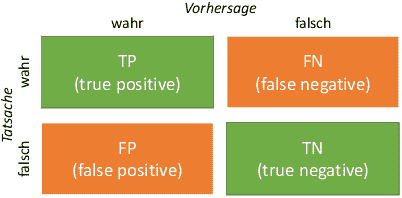

## Precision
*Precision* gibt als Maß an, wie viele der als wahr vorhergesagten Objekte tatsächlich diese Klasse besitzen. Umgekehrt könnte man es als Fähigkeit des Klassifikators bezeichnen, Beispiele nicht als wahr zu bewerten, die tatsächlich negativ sind. Auf Basis der getroffenen Einteilung berechnet sich die Precision wie folgt.

$$
P = \dfrac{TP}{TP+FP}
$$

Auch für die Precision existiert eine Funktion in `scikit-learn`.

In [ ]:
from sklearn.metrics import precision_score

@interact(n=IntSlider(3, 1, 30, 1))
def _(n):
    return precision_score(df_test['gender'], fit_and_predict(n))

## Recall
*Recall* oder auch *Trefferquote* gibt als Maß an, wie viele der wahren Beispiele durch den Klassifikator tatsächlich aufgedeckt wurden. Auf Basis der getroffenen Einteilung berechnet sich der Recall wie folgt.

$$
R = \dfrac{TP}{TP+FN}
$$

Auch für den Recall existiert eine Funktion in `scikit-learn`.

In [ ]:
from sklearn.metrics import recall_score

@interact(n=IntSlider(3, 1, 30, 1))
def _(n):
    return recall_score(df_test['gender'], fit_and_predict(n))

## Kompromisse
In realen Szenarien werden Precision und Recall niemals gleichzeitig $1$ sein. Es gestaltet sich dagegen eher so, dass eine Optimierung immer einen Kompromiss beider Werte zur Folge hat. Ohne einen starken Rückgang des jeweils anderen Wertes lassen sich beide nicht perfektionieren.

Stellen Sie sich beispielsweise vor, dass Patienten als gesund oder krank klassifiziert werden sollen. Personen mit schwachen Symptomen könnten beispielsweise als gesund (aber übermüdet) eingestuft werden, sodass der Recall sinkt. Diese Patienten dennoch ausnahmslos als krank zu betrachten, wird immer einige einschließen, die tatsächlich nur stark erschöpft sind, sodass die Precision sinkt.

Allerdings ist es natürlich je nach Problem sogar notwendig, einseitig zu optimieren. Wird eine Vorauswahl für die Beschädigung sicherheitsrelevanter Bauteile getroffen, ist es vermutlich besser, $100$ Fälle an einen menschlichen Experten zu übergeben als auch nur ein defektes Teil in einem Hochgeschwindigkeitszug zu verbauen.

## F1-Maß
Das F1-Maß ist das harmonische Mittel aus Precision und Recall. Diese beiden Werte fließen also zu gleichen Teilen in das Ergebnis ein. Ob diese Gewichtung erwünscht ist, hängt erneut von der Problemstellung ab.

$$
F_1 = 2 * \dfrac{P*R}{P+R}
$$

Natürlich stellt `scitkit-learn` auch für das F1-Maß eine Funktion bereit.

In [ ]:
from sklearn.metrics import f1_score

@interact(n=IntSlider(3, 1, 30, 1))
def _(n):
    return f1_score(df_test['gender'], fit_and_predict(n))